In [1]:
# Verify required packages are available
import sys
print(f"Python version: {sys.version}")

try:
    import numpy as np
    print(f"✓ numpy {np.__version__} is available")
except ImportError as e:
    print(f"✗ numpy not available: {e}")

try:
    import matplotlib.pyplot as plt
    print("✓ matplotlib is available")
except ImportError as e:
    print(f"✗ matplotlib not available: {e}")

print("All required packages are ready!")

Python version: 3.12.12 (main, Oct  9 2025, 11:07:00) [Clang 17.0.0 (clang-1700.6.3.2)]
✓ numpy 2.4.1 is available
✓ matplotlib is available
All required packages are ready!


In [2]:
# Multi-Episode Runner and Analysis
# This cell runs 50 episodes for both the reflex agent and the greedy agent, logs performance metrics, and visualizes the results.

import importlib
import numpy as np
import matplotlib.pyplot as plt
from warehouse_env import WarehouseEnv
from warehouse_agent_reflex import WarehouseAgentReflex
from warehouse_agent_greedy import GreedyManhattanAgent
import run_episode
importlib.reload(run_episode)  # Reload the module to get latest changes
from run_episode import run_episode, run_agent
NUM_EPISODES = 50

In [3]:
# Run Agent Episodes
# Runs multiple episodes for a given agent class and collects statistics

def analyze_stats(stats):
    arr = lambda k: np.array(stats[k])
    success_rate = arr('success').mean()
    successful_steps = arr('steps')[arr('success') == 1]
    mean_steps = successful_steps.mean() if len(successful_steps) > 0 else float('nan')
    median_steps = np.median(successful_steps) if len(successful_steps) > 0 else float('nan')
    return {
        'success_rate': success_rate,
        'mean_steps': mean_steps,
        'median_steps': median_steps,
    }

In [4]:
# Analyze Statistics
# Computes success rate, mean, and median episode length for successful episodes.

def plot_comparison(stats_dict):
    labels = list(stats_dict.keys())
    n = len(labels)
    # Success rate
    success_rates = [analyze_stats(stats_dict[l])['success_rate'] for l in labels]
    # Box plots for episode lengths (successful only)
    steps_data = [np.array(stats_dict[l]['steps'])[np.array(stats_dict[l]['success']) == 1] for l in labels]
    # Histograms for battery
    battery_data = [stats_dict[l]['battery'] for l in labels]
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    # Bar chart: Success rate
    axs[0].bar(labels, [100 * s for s in success_rates], color=['#4e79a7', '#f28e2b'])
    axs[0].set_ylabel('Success Rate (%)')
    axs[0].set_title('Success Rate')
    for i, v in enumerate(success_rates):
        axs[0].text(i, 100 * v + 2, f"{100*v:.1f}%", ha='center')
    # Box plot: Episode length
    axs[1].boxplot(steps_data, tick_labels=labels)
    axs[1].set_ylabel('Episode Length (steps)')
    axs[1].set_title('Episode Lengths (Successful)')
    # Histogram: Final battery
    axs[2].hist(battery_data, bins=10, label=labels, alpha=0.7)
    axs[2].set_xlabel('Final Battery')
    axs[2].set_ylabel('Count')
    axs[2].set_title('Final Battery Distribution')
    axs[2].legend()
    plt.tight_layout()
    plt.show()

Running Reflex Agent...
Running Greedy Agent...

Reflex Agent:
  Success Rate: 0.0%
  Mean Steps (successful): nan
  Median Steps (successful): nan

Greedy Agent:
  Success Rate: 100.0%
  Mean Steps (successful): 11.0
  Median Steps (successful): 11.0


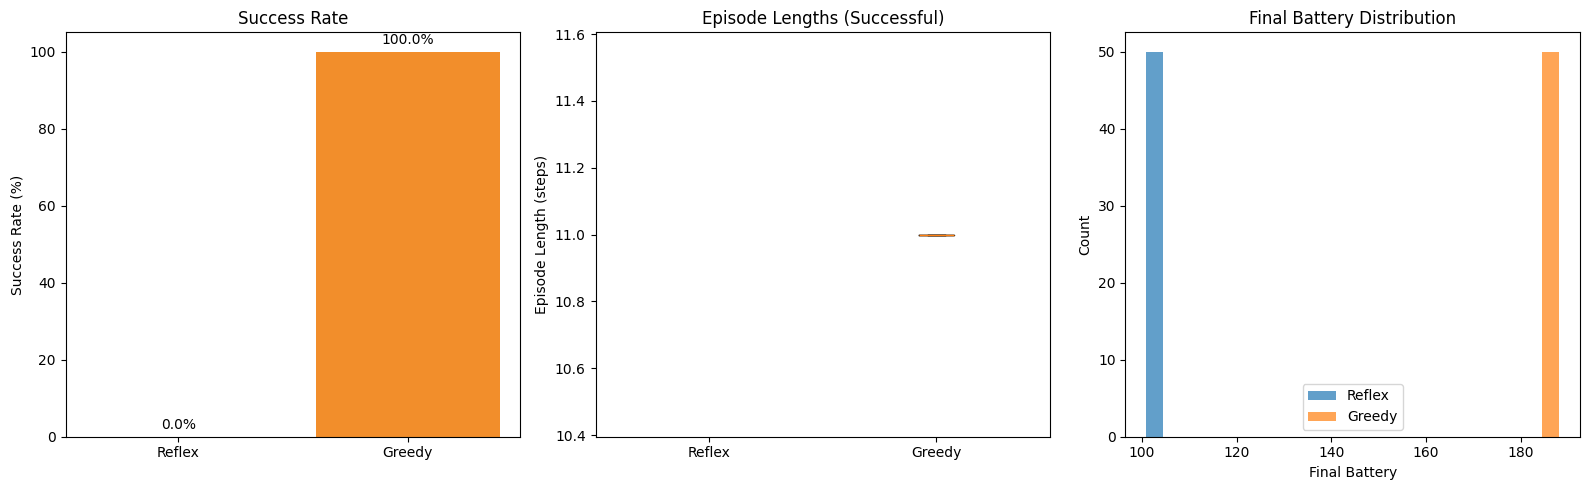

In [6]:
# Plot Comparison
# Visualizes success rate, episode length distribution, and battery histograms for both agents.

print("Running Reflex Agent...")
reflex_stats = run_agent(WarehouseAgentReflex, 'Reflex')
print("Running Greedy Agent...")
greedy_stats = run_agent(GreedyManhattanAgent, 'Greedy')
stats_dict = {'Reflex': reflex_stats, 'Greedy': greedy_stats}
for label, stats in stats_dict.items():
    analysis = analyze_stats(stats)
    print(f"\n{label} Agent:")
    print(f"  Success Rate: {analysis['success_rate']*100:.1f}%")
    print(f"  Mean Steps (successful): {analysis['mean_steps']:.1f}")
    print(f"  Median Steps (successful): {analysis['median_steps']:.1f}")
plot_comparison(stats_dict)